# Explore the Andes dataset

In [10]:
%matplotlib notebook

In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt

from astropy.table import Table

# Load

In [2]:
tbl_file=os.path.join(os.getenv('DESI_UMAP'), 'andes_S2N_spec.fits')

In [3]:
andes_tbl = Table.read(tbl_file)

In [4]:
andes_tbl

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,MEAN_DELTA_X,MEAN_DELTA_Y,FIBER_RA,FIBER_DEC,NIGHT,EXPID,MJD,TILEID,COADD_NUMEXP,RMS_DELTA_X,RMS_DELTA_Y,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_FIBER,LAST_FIBER,NUM_FIBER,S_N_r,Z,ZWARN,SPECTYPE
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,int16,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float32,float64,int64,bytes6
35190982328718648,0,459,459,231,512,104.55545725101197,36.60138233876448,4.900216,-5.4885893,42.29024,47.353317,2015.5,5400.0,545,1,TGT,90.778465,-351.59277,0,59,0.7745636402324717,7,14,8001,527428,1044p365,5432,PSF,1695740200000000.0,1475938800000000.0,0.094205886,58.82356,169.43456,284.13696,229.3759,22.628628,27.123669,0.75663936,0.82873887,0.90025735,1.0721981e-05,3.826281e-06,3.7990158e-06,0.0005179302,0.23572497,0.028075755,0.99999994,0.9999999,0.99999976,6,2,4,1078.5791,236.00189,168.48183,823.558,161.90184,86.61641,135.1858,64.425224,29.44825,257.96872,2.8679764,0.52062815,0.0008355128,1.2016518e-05,0.9841617,0.99024326,0.9979111,0.9992107,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.683174,131.58519,220.66464,45.683174,131.58519,220.66464,0,0,0,940753899756726528,G2,17.070635,860.8483,17.764786,113.19001,16.276514,201.20639,1.2721139,0.0,True,0.16078776,True,0.8088824,94.96686,N,545,59,1,6684,0.0,0.0,0.0,0.0,0,0,0,3,91.095,-349.886,-0.37

# Cut

## $z < 0.3$ Galaxies

In [5]:
lowz = andes_tbl['Z'] < 0.3

In [6]:
not_star = andes_tbl['Z'] > 0.002

In [7]:
galaxy = andes_tbl['SPECTYPE'] == 'GALAXY'

In [14]:
pos_SN = andes_tbl['S_N_r'] > 0.

In [15]:
all_cuts = lowz & not_star & galaxy & pos_SN
lowz_galaxies = andes_tbl[all_cuts]

In [16]:
lowz_galaxies

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,MEAN_DELTA_X,MEAN_DELTA_Y,FIBER_RA,FIBER_DEC,NIGHT,EXPID,MJD,TILEID,COADD_NUMEXP,RMS_DELTA_X,RMS_DELTA_Y,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_FIBER,LAST_FIBER,NUM_FIBER,S_N_r,Z,ZWARN,SPECTYPE
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,int16,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float32,float64,int64,bytes6
35191001677042222,2,80,2080,1257,0,104.21574455684318,37.58407833792057,1.2901278,-1.856792,2.819124,2.7975106,2015.5,5400.0,545,1,TGT,152.75775,-101.001656,0,54,0.8898656459942746,7,14,8001,532041,1041p375,4654,PSF,136891714000000.0,123596150000000.0,0.10386009,22.742815,37.710457,47.220963,419.25146,133.1261,64.28314,0.7353219,0.8129375,0.89061534,1.2774162e-05,2.6379266e-05,4.455098e-05,0.0005715415,0.0005549144,0.0055534653,0.9999924,0.99998665,0.9996697,4,4,3,1294.702,317.50702,121.81659,968.7587,224.9315,72.05361,19.868223,12.552322,-8.314528,115.26236,2.8399646,0.53004074,0.0007351238,1.08625045e-05,0.9825528,0.98924875,0.9976973,0.9991299,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.679388,29.314655,36.707756,17.679388,29.314655,36.707756,0,0,0,941127252673235328,G2,18.647655,277.37494,19.034952,31.697062,18.00724,32.733707,1.2816067,0.0,True,0.7647758,True,0.4015094,16.731146,N,545,54,1,6687,0.0,0.0,0.0,0.0,0,0,0,3,152.667,-100.956,0.003

### Plot S/N

In [17]:
np.min(lowz_galaxies['S_N_r'])

3.0529915e-07

<IPython.core.display.Javascript object>


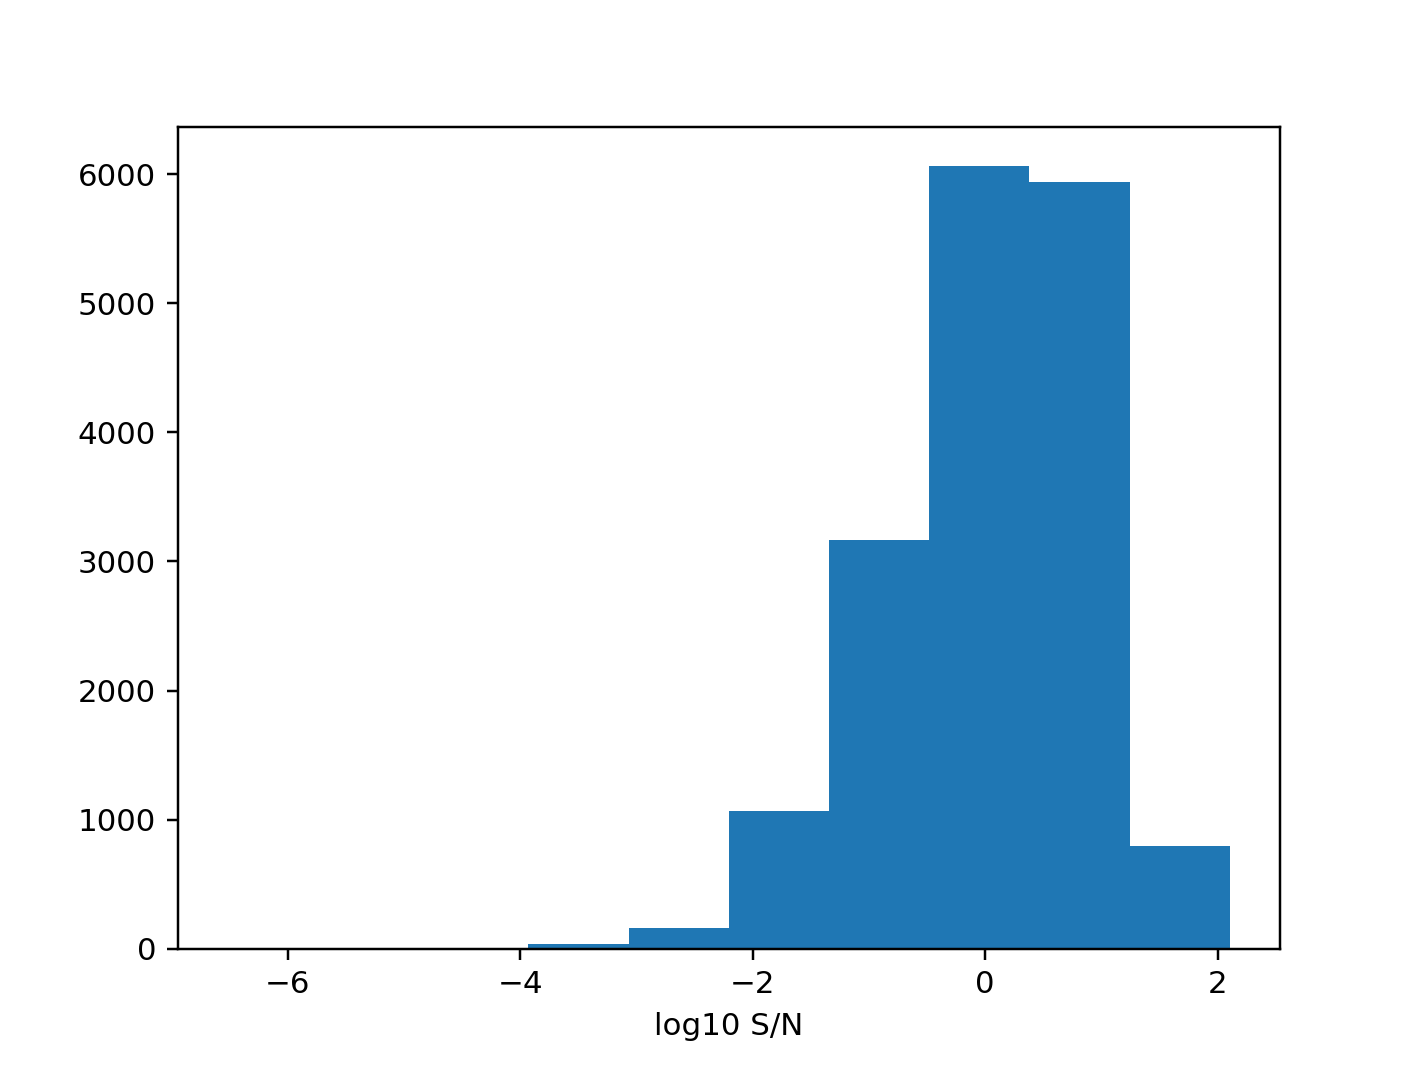

In [19]:
plt.clf()
ax = plt.gca()
ax.hist(np.log10(lowz_galaxies['S_N_r']))
#
ax.set_xlabel('log10 S/N')
plt.show()

# Write

In [20]:
lowz_galaxies.write(os.path.join(os.getenv('DESI_UMAP'), 'andes_glxy_zLT03.fits'), overwrite=True)